# Work with Measurement Data

In this example Notebook, we show you how to use the *Peak ODS Adapter for Apache Spark* to interact with ODS data using Spark SQL and DataFrames.

The first section is on configuring the Spark framework and the *Peak ODS Adapter for Apache Spark*. The fun starts with "Work with Measurement Data".

Happy sparking!



## Initialize Spark





### Configure Spark

Initialize the Spark context and configure it for using the *Peak ODS Adapter for Apache Spark* as plugin. 

In this example we create and connect to a local Spark Master.



In [1]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

conf = SparkConf().set("spark.jars", "/target/spark-ods.jar")
conf.set("spark.sql.repl.eagerEval.enabled",True)


spark = SparkSession.builder.master('local[*]').config(conf = conf).getOrCreate() # or 'spark://spark-master:7077'
sc = spark.sparkContext

### Initialize the Peak ODS Adapter for Apache Spark. 

To work with the *Peak ODS Adapter for Apache Spark*, you need to define the connection information `conInfo` to the *Peak ODS Server* together with the location of the bulk data files on disc.

The connection information is then passed to the `connectionManager` to establish the ODS connection. This `odsConnection` has to be provided in all Spark ODS operations.

> You have to add an override to the ODS MULTI_VOLUME symbol `DISC1` to access the bulk data files in the Spark environment. 

In [2]:
conInfo = {
    "url": "http://nvhdemo:8080/api/",
    "user": "sa",
    "password": "sa",
    "override.symbol.DISC1": "file:///data/NVH/"
}

connectionManager = sc._jvm.com.peaksolution.sparkods.ods.ConnectionManager.instance
odsConnection = connectionManager.createODSConnection(conInfo)

## Work with Measurement Data

In the previous chapter you've learned how to work with instance data, now let's have a look at the actual measurement data.
You use `format("ods")` to load measurement data.

 In our example we're looking for a measurement with a specific "Id" - you may want to try more fancy queries...

In [3]:
df = spark.read.format("ods").options(**odsConnection).load("where MeaResult.Id = 3")

You can now look at the first 10 rows...

In [4]:
df.limit(10)

idref,channel01,channel02,channel03,channel04,channel05,channel06,channel07,channel08,channel09,channel10,x-axis
NVHDEMO_SubMatrix_3,4.38541E-6,2.02778,-4.44111,-4.51025,1.86265E-6,-1.74623E-7,-0.192593,0.770431,-0.579521,0.371926,1
NVHDEMO_SubMatrix_3,4.38541E-6,2.02778,-2.03551,-4.51025,1.86265E-6,-1.74623E-7,-0.192593,0.770431,-0.579521,0.371926,2
NVHDEMO_SubMatrix_3,4.38541E-6,2.02778,-4.44111,-4.51025,-6.52153,-1.74623E-7,-0.192593,0.770431,-0.579521,0.371926,3
NVHDEMO_SubMatrix_3,2.40175,2.02778,-4.44111,2.00455,-6.52153,-1.74623E-7,-0.192593,0.770431,-0.579521,0.371926,4
NVHDEMO_SubMatrix_3,4.38541E-6,-0.368683,-4.44111,2.00455,-6.52153,-1.74623E-7,-0.192593,0.770431,-0.579521,0.371926,5
NVHDEMO_SubMatrix_3,4.38541E-6,-0.368683,-2.03551,-4.51025,1.86265E-6,-1.74623E-7,-0.192593,0.770431,-0.579521,0.371926,6
NVHDEMO_SubMatrix_3,2.40175,2.02778,-4.44111,-4.51025,-6.52153,-1.74623E-7,-0.192593,0.770431,-0.579521,0.371926,7
NVHDEMO_SubMatrix_3,4.38541E-6,-0.368683,-2.03551,-4.51025,1.86265E-6,-1.74623E-7,-0.192593,0.770431,-0.579521,0.371926,8
NVHDEMO_SubMatrix_3,4.38541E-6,2.02778,-4.44111,-4.51025,-6.52153,-5.43436,-0.192593,0.577823,-0.579521,0.371926,9
NVHDEMO_SubMatrix_3,4.38541E-6,2.02778,-2.03551,-4.51025,1.86265E-6,-1.74623E-7,-0.192593,0.770431,-0.579521,0.371926,10


... or plot them in a line chart ...

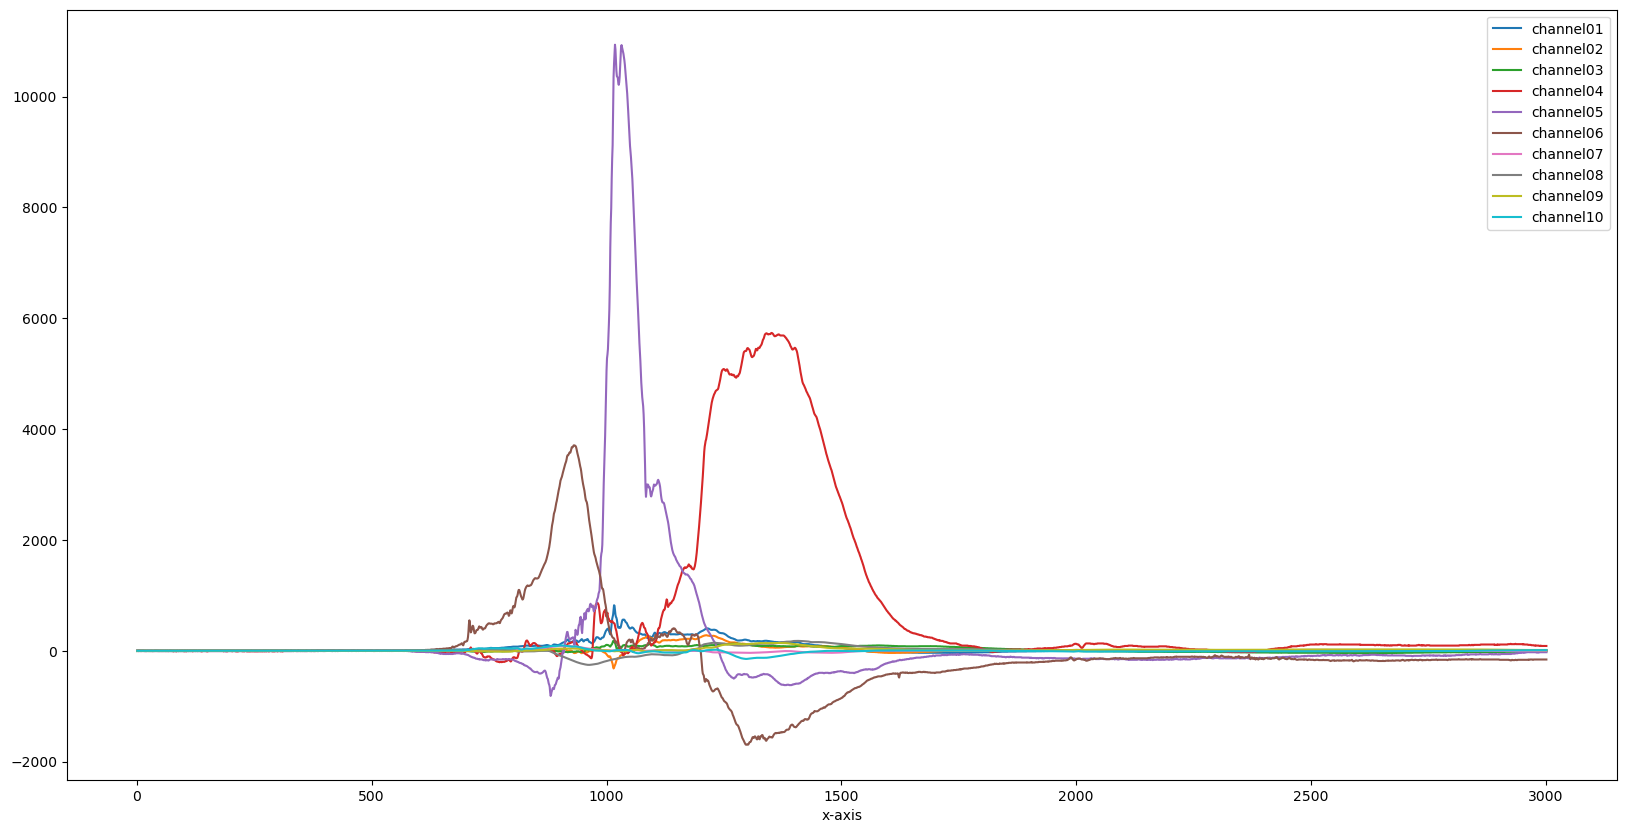

In [5]:
%matplotlib inline
import pandas as pd
import pyspark
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)
pdf = df.toPandas().groupby(["idref", "x-axis"], group_keys=True).sum()
pdf.loc['NVHDEMO_SubMatrix_3'].plot()
plt.show()

Now that your measurement data is in a pandas.DataFrame, you can also use all options using pandas.

Have fun.

## Close the SparkContext
It is a good practice to close the SparkContext when you’re done with it.

This will ensure that all Spark-related operations are properly terminated before your program exits.


In [6]:
sc.stop()

## License

Copyright © 2025 [Peak Solution GmbH](https://peak-solution.de)

The training material in this repository is licensed under a Creative Commons BY-NC-SA 4.0 license. See [LICENSE](../LICENSE) file for more information.